In [30]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [31]:
#importar dados
dataset = pd.read_csv("../dados/Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [32]:
dataset.shape

(999, 12)

In [33]:
# dando nome as colunas
dataset.columns = ['id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos', 'temCartaoCredito', 'ativo', 'salario', 'saiu']
dataset.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [34]:
# Exploracao de dados Categoricos
agrupado = dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

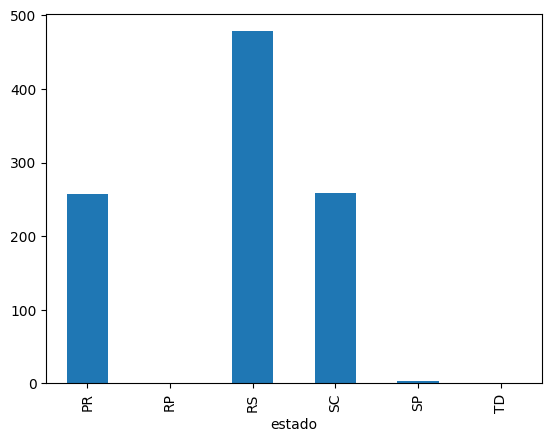

In [35]:
agrupado.plot.bar()

In [36]:
agrupado = dataset.groupby(['genero']).size()
agrupado

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='genero'>

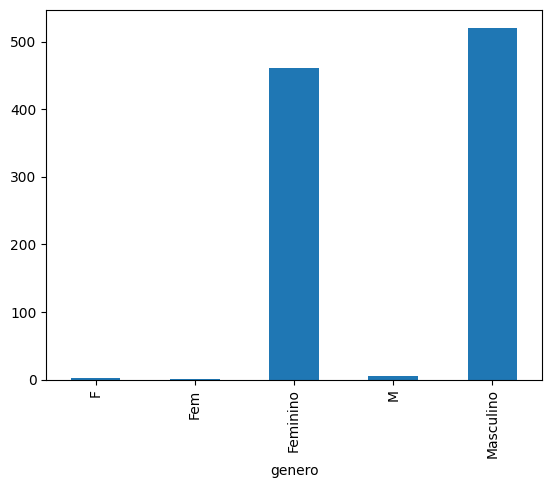

In [37]:
agrupado.plot.bar()

In [38]:
# Exploracao de colunas numericas
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Score')

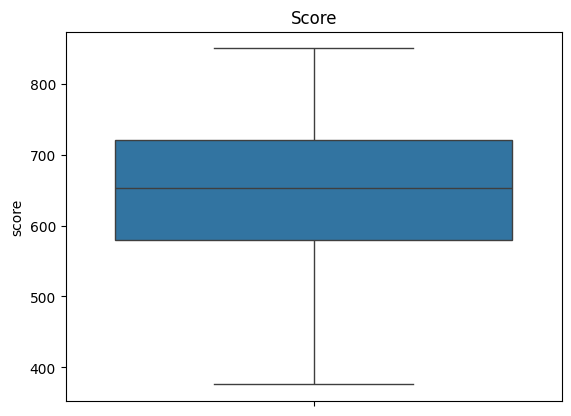

In [39]:
srn.boxplot(dataset['score']).set_title('Score')

<Axes: xlabel='score', ylabel='Count'>

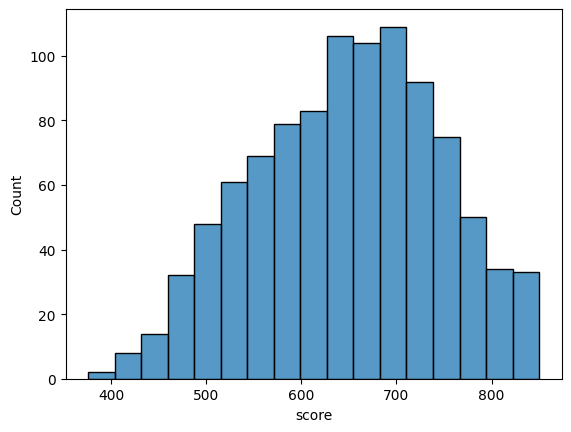

In [40]:
srn.histplot(dataset[('score')])

In [41]:
dataset['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

<Axes: ylabel='idade'>

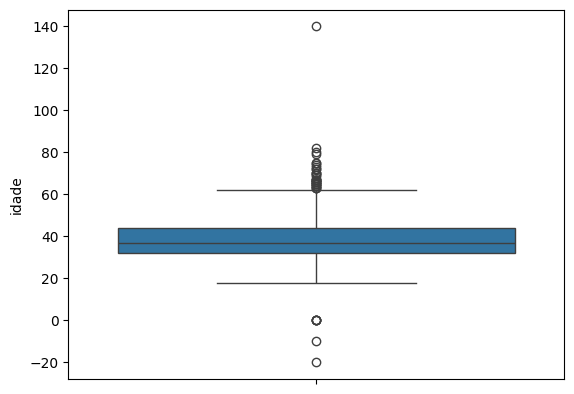

In [42]:
srn.boxplot(dataset[('idade')])

<Axes: xlabel='idade', ylabel='Count'>

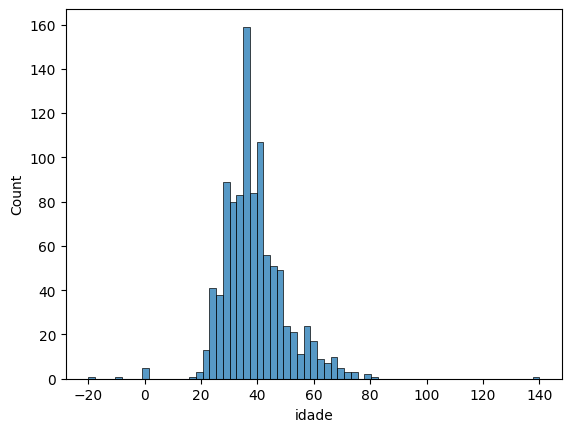

In [43]:
srn.histplot(dataset[('idade')])

In [44]:
dataset['saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

<Axes: ylabel='saldo'>

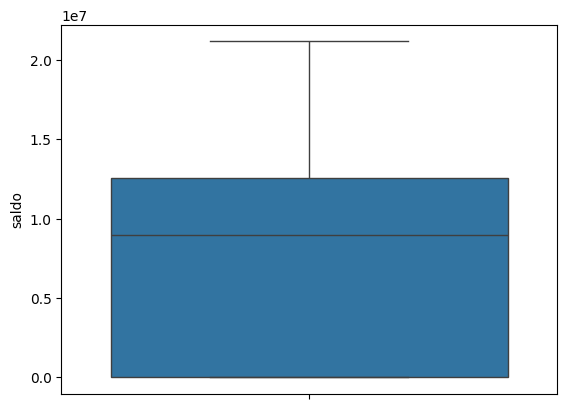

In [45]:
srn.boxplot(dataset['saldo'])

<Axes: xlabel='saldo', ylabel='Count'>

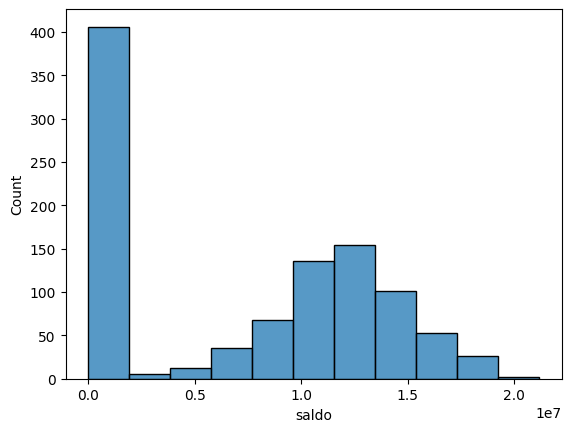

In [46]:
srn.histplot(dataset['saldo'])

In [47]:
dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

<Axes: ylabel='salario'>

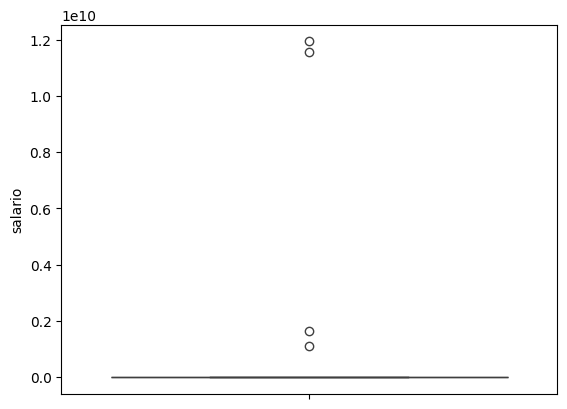

In [48]:
srn.boxplot(dataset['salario'])

<Axes: xlabel='salario', ylabel='Count'>

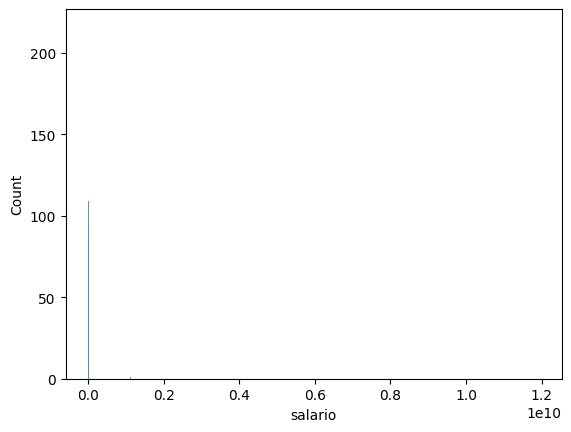

In [49]:
srn.histplot(dataset['salario'])

In [91]:
# valores nulos
dataset.isnull().sum()

id                  0
score               0
estado              0
genero              0
idade               0
patrimonio          0
saldo               0
produtos            0
temCartaoCredito    0
ativo               0
salario             0
saiu                0
dtype: int64

In [51]:
mediana = sts.median(dataset['salario'])
mediana

70518.0

In [52]:
# substituir nan por mediana
dataset['salario'].fillna(mediana, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_9156\4082334974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salario'].fillna(mediana, inplace=True)


In [53]:
# verificar pra ver se existe valores nulo em salario
dataset['salario'].isnull().sum()

np.int64(0)

In [54]:
# verificar genero
agrupado = dataset.groupby(['genero']).size()
agrupado

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [55]:
dataset['genero'].isnull().sum()

np.int64(8)

In [56]:
# preencher com masculino os valores nulos
dataset['genero'].fillna('Masculino', inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_9156\4135483122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['genero'].fillna('Masculino', inplace=True)


In [57]:
# verificando
dataset['genero'].isnull().sum()

np.int64(0)

In [59]:
# padronizando os gerneros, tem quer ser o msm nome, se nao cria outros valores
dataset.loc[dataset['genero'] == 'M', 'genero'] = 'Masculino'
dataset.loc[dataset['genero'].isin(['Fem', 'F']), 'genero'] = 'Feminino'

agrupado = dataset.groupby(['genero']).size()
agrupado

genero
Feminino     464
Masculino    535
dtype: int64

In [60]:
# idades fora do dominio
dataset['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

In [73]:
# Visualizar dados fora da realidade
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu


In [69]:
# calcular a mediana
mediana = sts.median(dataset['idade'])
mediana

37

In [72]:
# substituir
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120), 'idade' ] = mediana

In [ ]:
# verificar se ta fora do normal ainda
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120)]

In [74]:
# dados duplicados,buscando pelo ID
dataset[dataset.duplicated(['id'], keep=False)]


,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [75]:
# excluindo pelo id
dataset.drop_duplicates(subset='id', keep='first', inplace=True)
# buscando duplicados
dataset[dataset.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu


In [76]:
# estado fora do dominio
agrupado = dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [78]:
# atribuindo rs moda
dataset.loc[dataset['estado'].isin(['RP', 'SP', 'TD']), 'estado'] = 'RS'
agrupado = dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RS    483
SC    258
dtype: int64

In [80]:
# Outliers em salario, considerando 2 desvios padao
desvioPadrao = sts.stdev(dataset['salario'])
desvioPadrao

528988918.4679201

In [82]:
# definir padrao como maior que 2 desvios padao
# checando se algum atende ao criterio
dataset.loc[dataset['salario'] >= 2*desvioPadrao]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [83]:
mediana = sts.median(dataset['salario'])
mediana

8637195.5

In [84]:
# atribuindo
dataset.loc[dataset['salario'] >= 2 * desvioPadrao, 'salario'] = mediana
# checando se atendo ao criterio
dataset.loc[dataset['salario'] >= 2 * desvioPadrao]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu


In [86]:
dataset.head(20)

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temCartaoCredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
6,7,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,8637195.5,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,749405.0,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7172573.0,0


In [87]:
dataset.shape

(998, 12)

In [90]:

# salvar dados atualizados
dataset.to_csv("../dados/dados_atualizados{25_02_2024}.csv", sep=";", index=False)
